# Classification


Dataset: Dataset of Diabetes.csv

https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset?resource=download

Objective

-   Indicating the diabetes status of the patients


### Assignment 1: Exploratory Data Analysis (30 points)

1. Display the basic description of the dataset, including its shape, columns, and data types.
2. Drop the 'ID', 'No_Pation' column.
3. Replace missing values in 'CLASS' with 'P'
4. Boxplot to visualize relationships between 'HbA1c' and 'Gender'
5. Scatterplot to visualize relationship between 'Age' and 'Urea' with different 'CLASS'
6. Countplot to visualize 'Gender' distribution with different 'CLASS'
7. Choose and visualize some relationships


Assignment 1: -----------------
1: -----------------
Shape of dataset: (1000, 14)
-----
Columns:
 Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')
-----
Data types:
 ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object
-----
Summary statistics:
                  ID     No_Pation Gender          AGE         Urea  \
count   1000.000000  1.000000e+03   1000  1000.000000  1000.000000   
unique          NaN           NaN      3          NaN          NaN   
top             NaN           NaN      M          NaN          NaN   
freq            NaN           NaN    565          NaN          NaN   
mean     340.500000  2.705514e+05    NaN    53.528

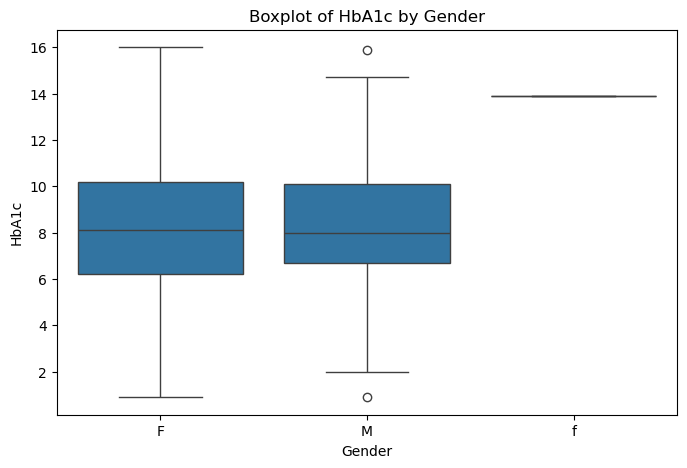

5: -----------------
Scatterplot of AGE vs Urea by CLASS


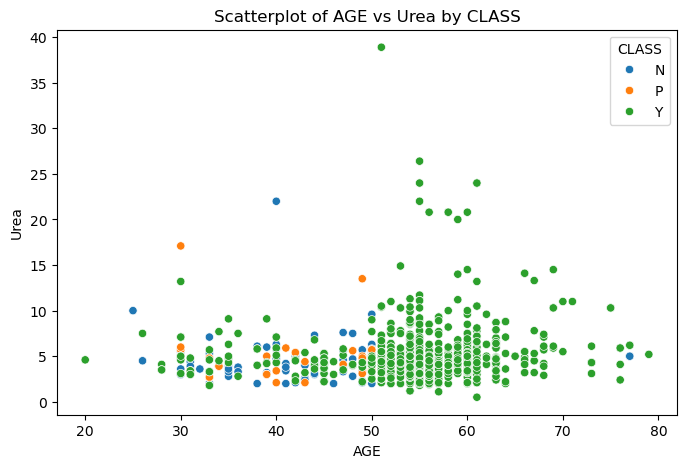

6: -----------------
Countplot of Gender by CLASS


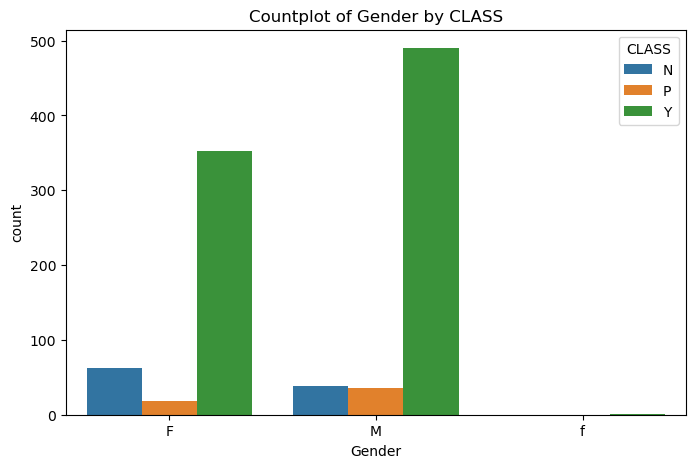

7: -----------------
HbA1c & BMI by CLASS


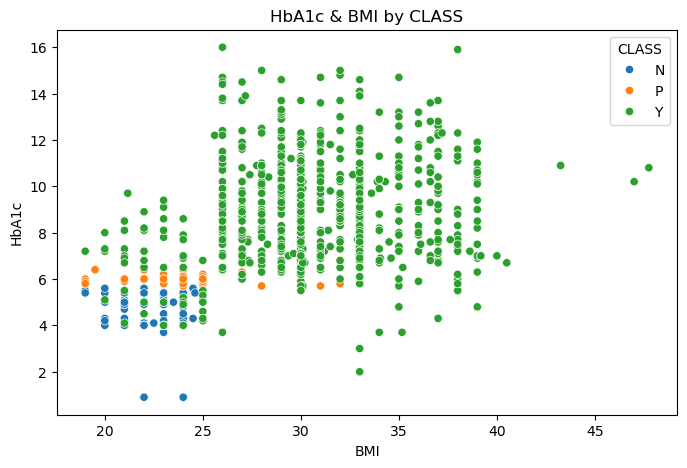

-----
AGE & Gender by CLASS


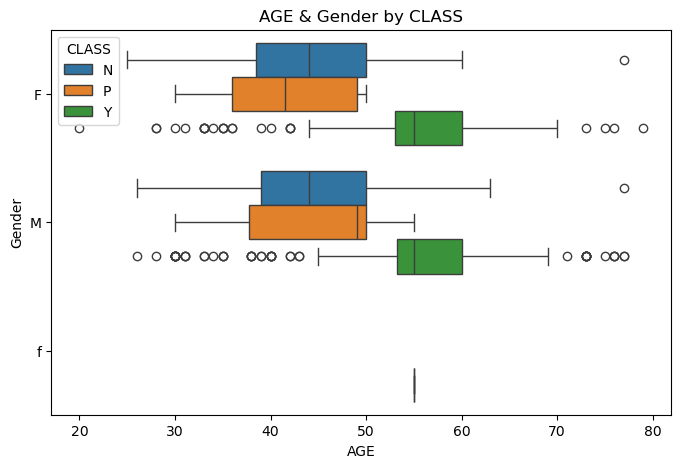

-----
Urea & Cr by CLASS


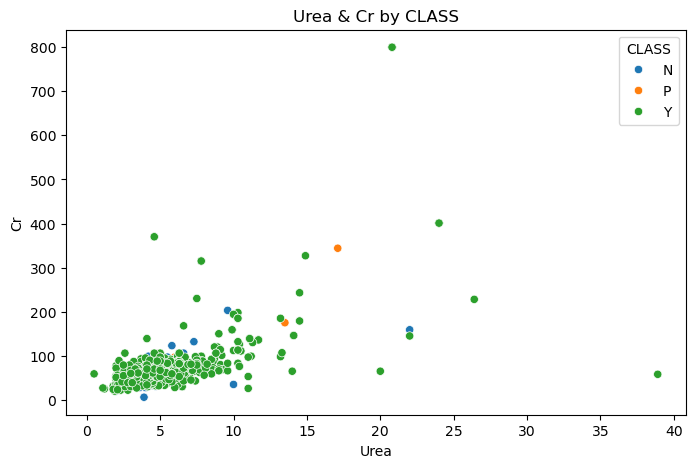

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file = "Dataset of Diabetes.csv"
df = pd.read_csv(file)

# Assignment 1
print("Assignment 1: -----------------")
# 1. Display the basic description of the dataset, including its shape, columns, and data types
print("1: -----------------")
print("Shape of dataset:", df.shape)
print("-----")
print("Columns:\n", df.columns)
print("-----")
print("Data types:\n", df.dtypes)
print("-----")
print("Summary statistics:\n", df.describe(include="all"))

# 2. Drop the 'ID', 'No_Pation' column
print("2: -----------------")
df = df.drop(["ID", "No_Pation"], axis=1)
print("Shape of dataset after drop:", df.shape)
print("-----")
print("Columns after drop:\n", df.columns)

# 3. Replace missing values in 'CLASS' with 'P'
print("3: -----------------")
print("Before Fill Statistic:", df["CLASS"].isnull().sum())
df["CLASS"] = df["CLASS"].str.strip()
df["CLASS"] = df["CLASS"].fillna("P")
print("After Fill Statistic:", df["CLASS"].isnull().sum())

# 4. Boxplot to visualize relationships between 'HbA1c' and 'Gender'
print("4: -----------------")
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="HbA1c", data=df)
plt.title("Boxplot of HbA1c by Gender")
print("Boxplot of HbA1c by Gender")
plt.show()

# 5. Scatterplot to visualize relationship between 'Age' and 'Urea' with different 'CLASS'
print("5: -----------------")
plt.figure(figsize=(8, 5))
sns.scatterplot(x="AGE", y="Urea", hue="CLASS", data=df)
plt.title("Scatterplot of AGE vs Urea by CLASS")
print("Scatterplot of AGE vs Urea by CLASS")
plt.show()

# 6. Countplot to visualize 'Gender' distribution with different 'CLASS'
print("6: -----------------")
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="CLASS", data=df)
plt.title("Countplot of Gender by CLASS")
print("Countplot of Gender by CLASS")
plt.show()

# 7. Choose and visualize some relationships
print("7: -----------------")
plt.figure(figsize=(8, 5))
sns.scatterplot(x="BMI", y="HbA1c", hue="CLASS", data=df)
plt.title("HbA1c & BMI by CLASS")
print("HbA1c & BMI by CLASS")
plt.show()
print("-----")
plt.figure(figsize=(8, 5))
sns.boxplot(x="AGE", y="Gender", hue="CLASS", data=df)
plt.title("AGE & Gender by CLASS")
print("AGE & Gender by CLASS")
plt.show()
print("-----")
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Urea", y="Cr", hue="CLASS", data=df)
plt.title("Urea & Cr by CLASS")
print("Urea & Cr by CLASS")
plt.show()

### Assignment 2: Data Cleaning (20 points)

Identifying missing values and remove or impute where appropriate.


In [24]:
# Assignment 2
print("Assignment 2: -----------------")
print("Missing values per column:\n", df.isnull().sum())
print("-----")
df["HbA1c"] = df["HbA1c"].fillna(df["HbA1c"].median())
df["VLDL"] = df["VLDL"].fillna(df["VLDL"].median())
print("-----")
print("Missing values after cleaning:\n", df.isnull().sum())

Assignment 2: -----------------
Missing values per column:
 Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     1
Chol      0
TG        0
HDL       0
LDL       0
VLDL      1
BMI       0
CLASS     0
dtype: int64
-----
-----
Missing values after cleaning:
 Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64


### Assignment 3: Correlations (20 points)

1. Identifying highly correlated numeric columns (threashold is 0.6)
2. Choose and drop some columns in highly correlated pairs.


Assignment 3: -----------------
Numeric Dataframe:
    AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0   50   4.7  46    8.0   4.2  0.9  2.4  1.4   0.5  24.0
1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
-----
Correlation Heatmap


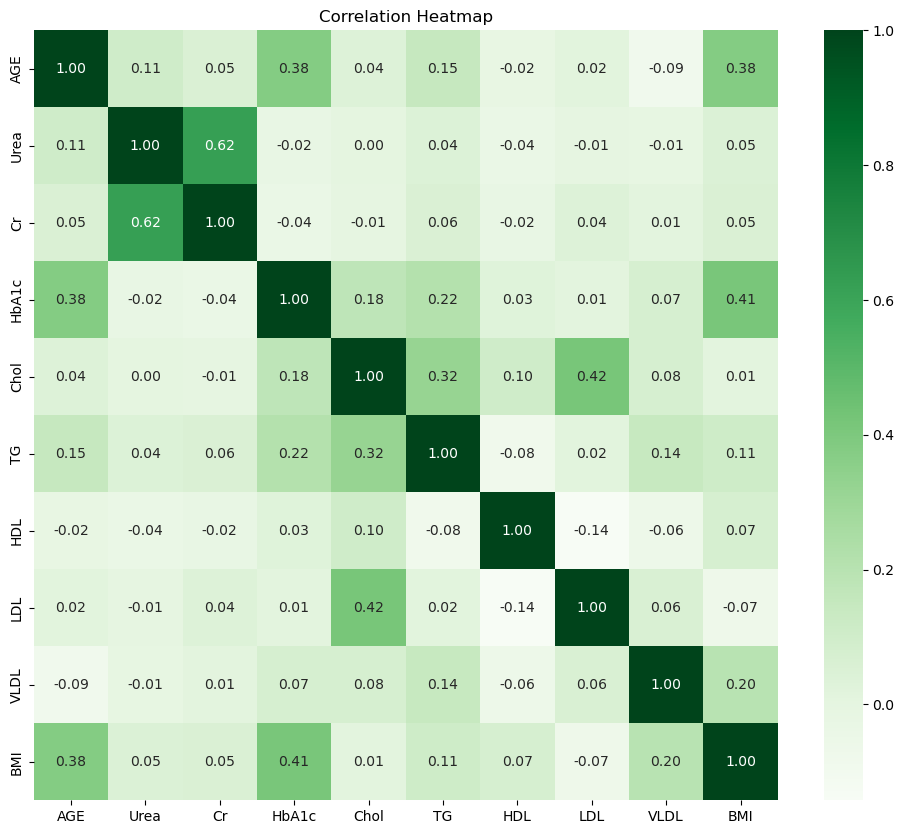

-----
Highly correlated pairs:
   Column 1 Column 2  Correlation
9     Urea       Cr     0.624134


In [25]:
# Assignment 3
print("Assignment 3: -----------------")
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()
print("Numeric Dataframe:\n", numeric_df.head())
print("-----")
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Greens")
plt.title("Correlation Heatmap")
print("Correlation Heatmap")
plt.show()
print("-----")
high_corr_pairs = (
    correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Column 1", "Column 2", "Correlation"]
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] > 0.6]
print("Highly correlated pairs:\n", high_corr_pairs)


### Assignment 4: Classfication (30 points)

1. Convert 'CLASS' to categorial data and reorder as specified in ['N', 'P', 'Y']
2. Convert categorical data to numerical data using label encoding.
3. Define features, target
4. Normalize or standardize features
5. Split the dataset into training (80%) and testing (20%) sets.
6. Reduce dimensionality using PCA
7. Train logistic regression model, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
8. Train K-nearest neighbors classfifier, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
9. Train naive Bayes model, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
10. Train decision tree classifier, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
11. Train random forest classifier, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
12. Train AdaBoost classifier, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.


Assignment 4: -----------------
1: -----------------
CLASS after reordering:
 0      N
1      N
2      N
3      N
4      N
      ..
995    Y
996    Y
997    Y
998    Y
999    Y
Name: CLASS, Length: 1000, dtype: category
Categories (3, object): ['N' < 'P' < 'Y']
2: -----------------
CLASS value counts:
 CLASS
2    844
0    102
1     54
Name: count, dtype: int64
-----
Gender value counts:
 Gender
1    565
0    434
2      1
Name: count, dtype: int64
3: -----------------
X (Features):
    Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0       0   50   4.7  46    8.0   4.2  0.9  2.4  1.4   0.5  24.0
1       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
-----
y (Target):
 0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64
4: -----------------
X_scaled:
 [[-1.139687

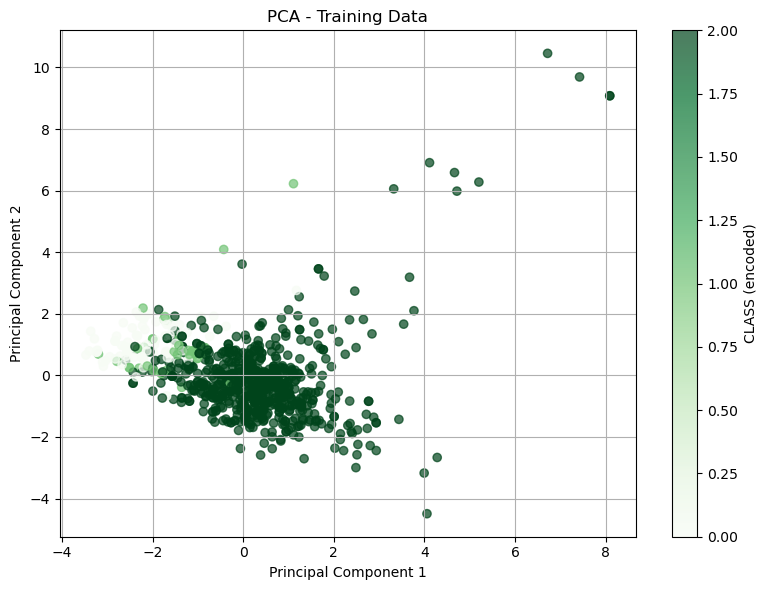

7: -----------------
Logistic Regression
+ Accuracy: 0.905
+ Precision: 0.5668099038264783
+ Recall: 0.5627218934911243
+ F1 Score: 0.5637092731829574
+ Confusion Matrix:
 [[ 14   1   5]
 [  2   0   9]
 [  2   0 167]]
Logistic Regression
-----


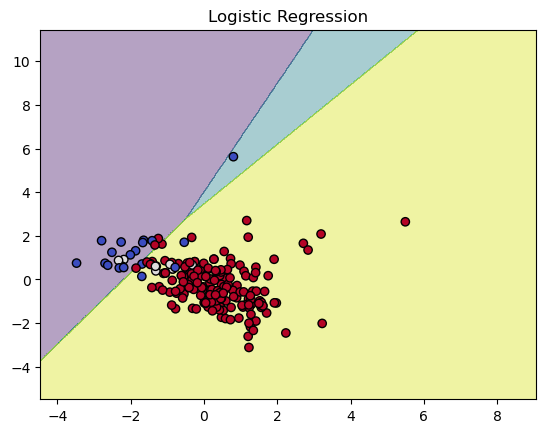

8: -----------------
K-nearest Neighbors
+ Accuracy: 0.895
+ Precision: 0.7024748755517987
+ Recall: 0.6720996951766182
+ F1 Score: 0.6778236009005241
+ Confusion Matrix:
 [[ 14   2   4]
 [  3   4   4]
 [  7   1 161]]
K-nearest Neighbors
-----


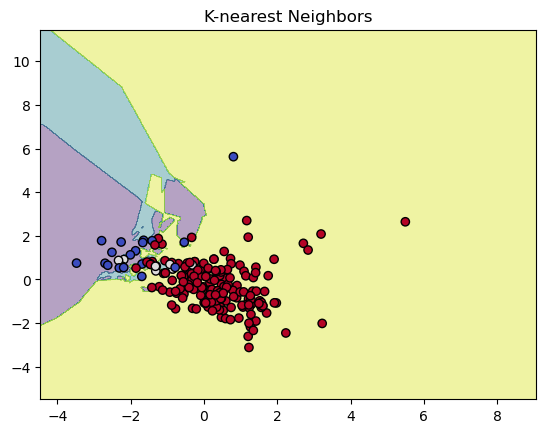

9: -----------------
Naive Bayes
+ Accuracy: 0.905
+ Precision: 0.5651200651200651
+ Recall: 0.5627218934911243
+ F1 Score: 0.5628030189433698
+ Confusion Matrix:
 [[ 14   0   6]
 [  2   0   9]
 [  2   0 167]]
Naive Bayes
-----


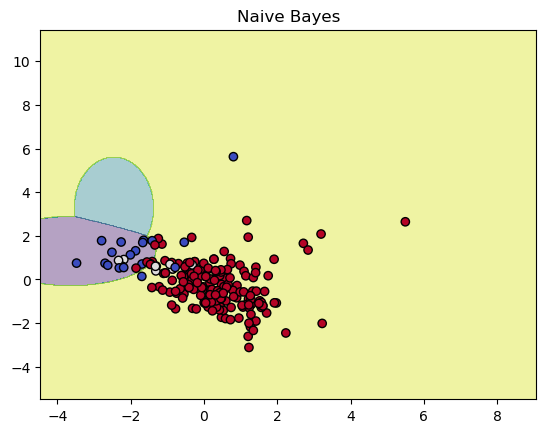

10: -----------------
Decision Tree
+ Accuracy: 0.91
+ Precision: 0.7354877091719197
+ Recall: 0.6927111350188273
+ F1 Score: 0.7058512293806412
+ Confusion Matrix:
 [[ 15   2   3]
 [  2   4   5]
 [  5   1 163]]
Decision Tree
-----


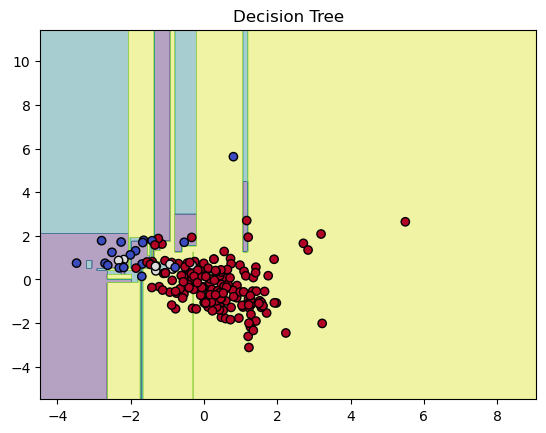

11: -----------------
Random Forest
+ Accuracy: 0.905
+ Precision: 0.7158914728682171
+ Recall: 0.6760444683521607
+ F1 Score: 0.6923547872614085
+ Confusion Matrix:
 [[ 14   2   4]
 [  2   4   5]
 [  4   2 163]]
Random Forest
-----


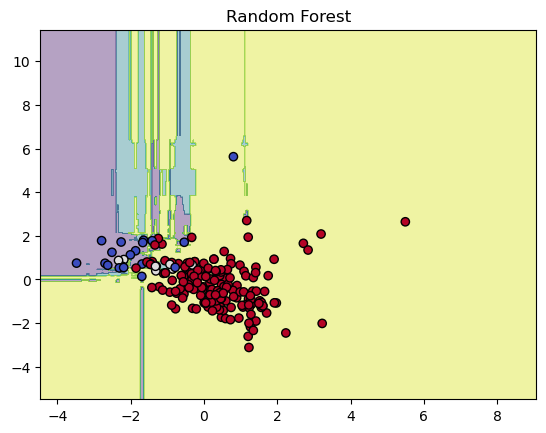

12: -----------------
AdaBoost
+ Accuracy: 0.9
+ Precision: 0.5362614913176711
+ Recall: 0.5754437869822485
+ F1 Score: 0.5550981199396184
+ Confusion Matrix:
 [[ 15   0   5]
 [  3   0   8]
 [  4   0 165]]
AdaBoost
-----


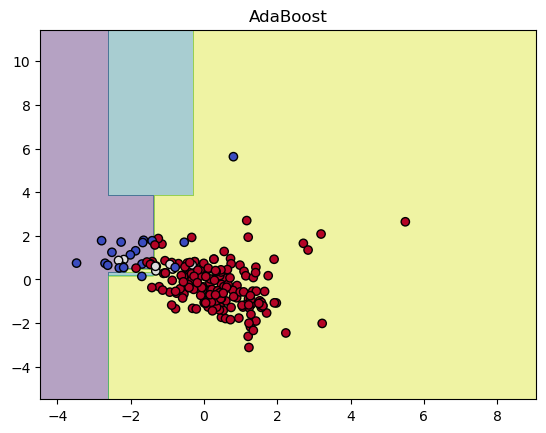

In [26]:
# Assignment 4
print("Assignment 4: -----------------")
# 1. Convert 'CLASS' to categorial data and reorder as specified in ['N', 'P', 'Y']
print("1: -----------------")
df["CLASS"] = df["CLASS"].astype("category")
df["CLASS"] = df["CLASS"].cat.set_categories(["N", "P", "Y"], ordered=True)
print("CLASS after reordering:\n", df["CLASS"])

# 2. Convert categorical data to numerical data using label encoding.
print("2: -----------------")
df["Gender"] = df["Gender"].astype("category")
df["Gender"] = df["Gender"].cat.set_categories(["F", "M"], ordered=True)
label_encoders = {}
for col in df.select_dtypes(include="category").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("CLASS value counts:\n", df["CLASS"].value_counts())
print("-----")
print("Gender value counts:\n", df["Gender"].value_counts())

# 3. Define features, target
print("3: -----------------")
X = df.drop("CLASS", axis=1)
y = df["CLASS"]
print("X (Features):\n", X.head())
print("-----")
print("y (Target):\n", y.head())

# 4. Normalize or standardize features
print("4: -----------------")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("X_scaled:\n", X_scaled)

# 5. Split the dataset into training (80%) and testing (20%) sets.
print("5: -----------------")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("X_train:\n", X_train)
print("-----")
print("X_test:\n", X_test)
print("-----")
print("y_train:\n", y_train)
print("-----")
print("y_test:\n", y_test)

# 6. Reduce dimensionality using PCA
print("6: -----------------")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,
    cmap="Greens",
    alpha=0.7,
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Training Data")
plt.colorbar(scatter, label="CLASS (encoded)")
plt.grid(True)
plt.tight_layout()
print("PCA - Training Data")
plt.show()


def evaluate_and_plot(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{title}")
    print("+ Accuracy:", accuracy_score(y_test, y_pred))
    print(
        "+ Precision:",
        precision_score(y_test, y_pred, average="macro", zero_division=0),
    )
    print("+ Recall:", recall_score(y_test, y_pred, average="macro", zero_division=0))
    print("+ F1 Score:", f1_score(y_test, y_pred, average="macro", zero_division=0))
    print("+ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Vẽ decision boundary
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.coolwarm
    )
    plt.title(title)
    print(title)
    print("-----")
    plt.show()


# 7. Train logistic regression model, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
print("7: -----------------")
evaluate_and_plot(
    LogisticRegression(),
    X_train_pca,
    y_train,
    X_test_pca,
    y_test,
    "Logistic Regression",
)

# 8. Train K-nearest neighbors classfifier, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
print("8: -----------------")
evaluate_and_plot(
    KNeighborsClassifier(),
    X_train_pca,
    y_train,
    X_test_pca,
    y_test,
    "K-nearest Neighbors",
)

# 9. Train naive Bayes model, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
print("9: -----------------")
evaluate_and_plot(GaussianNB(), X_train_pca, y_train, X_test_pca, y_test, "Naive Bayes")

# 10. Train decision tree classifier, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
print("10: -----------------")
evaluate_and_plot(
    DecisionTreeClassifier(), X_train_pca, y_train, X_test_pca, y_test, "Decision Tree"
)

# 11. Train random forest classifier, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
print("11: -----------------")
evaluate_and_plot(
    RandomForestClassifier(), X_train_pca, y_train, X_test_pca, y_test, "Random Forest"
)

# 12. Train AdaBoost classifier, calculate the accuracy, precision, recall, f1 score, confusion matrix and display the decision boundary.
print("12: -----------------")
evaluate_and_plot(
    AdaBoostClassifier(), X_train_pca, y_train, X_test_pca, y_test, "AdaBoost"
)